In [31]:
import kaggle
import os

# Define constants for dataset
DATASET_NAME = "predict-student-performance-dataset"
DATASET_OWNER = "stealthtechnologies"
DATASET_FILE = "data.csv"

# Fetching Dataset
if os.path.exists(DATASET_FILE):
    print("Dataset already exists.")
else:
    try:
        kaggle.api.dataset_download_files(f"{DATASET_OWNER}/{DATASET_NAME}", unzip=True)
        print("Dataset downloaded successfully.")
    except Exception as e:
        print(f"Failed to download dataset: {str(e)}")


Dataset already exists.


In [32]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("data.csv")

# Filling the Missing Values
if df.isna().any().any():
    df.fillna('0', inplace=True)

# To Normalize 
#d = skp.MinMaxScaler()
#df['Grades'] = d.fit_transform(df[['Grades']])

# Transform
# The string column to numerical if needed.


Linear Regression:

MAE: 3.3778633079186147, MSE: 19.31079825489118
MAE(cv): 
[-3.33285514 -3.4083579  -3.39116938 -3.69480491 -3.61022715]


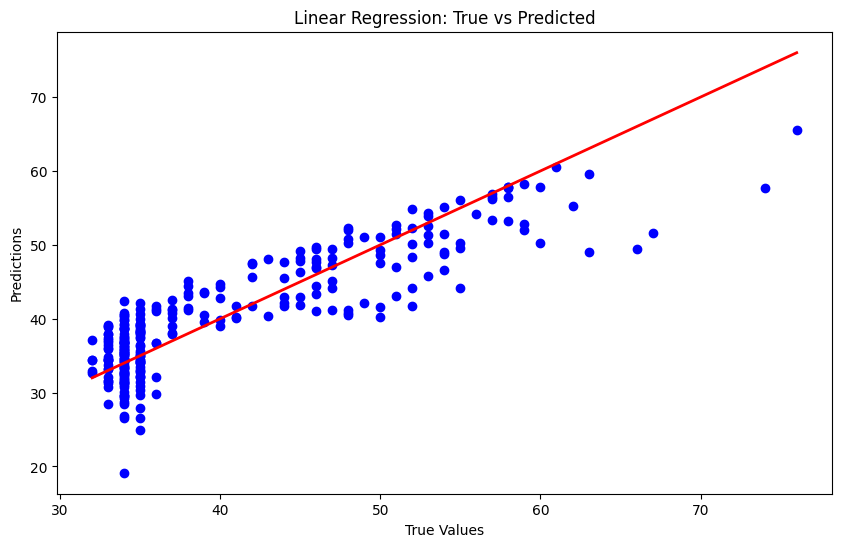

In [33]:
# Linear Regression 

model1 = LinearRegression()
df1 = df.copy()

X1 = df1[['Socioeconomic Score', 'Study Hours', 'Sleep Hours', 'Attendance (%)']]       # Features
Y1 = df1['Grades']                                                                      # Target

cross_score1 = cross_val_score(model1, X1, Y1, cv=5, scoring="neg_mean_absolute_error")

Xtrain1, Xtest1, Ytrain1, Ytest1 = train_test_split(X1, Y1, test_size=0.2, random_state=7)

model1.fit(Xtrain1, Ytrain1)
lpred = model1.predict(Xtest1)

print('\nLinear Regression:\n')
mae = mean_absolute_error(Ytest1, lpred)
mse = mean_squared_error(Ytest1, lpred)
print(f"MAE: {mae}, MSE: {mse}")
print(f"MAE(cv): \n{cross_score1}")


plt.figure(figsize=(10, 6))
plt.scatter(Ytest1, lpred, color='blue')
plt.plot([Ytest1.min(), Ytest1.max()], [Ytest1.min(), Ytest1.max()], color='red', linewidth=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Linear Regression: True vs Predicted')
plt.show()


SVM:


Accuracy:  0.9244604316546763
Precision:  0.9152273822588418
Recall:  0.9244604316546763
F1 Score:  0.9192558385332328

Cross Validation:
 [0.93884892 0.92805755 0.91366906 0.93140794 0.92418773]

Confusion Matrix: 
[[  0   2   0]
 [  0  34  13]
 [  0   6 223]]

Classification Report: 
              precision    recall  f1-score   support

        Good       0.00      0.00      0.00         2
     Average       0.81      0.72      0.76        47
         Bad       0.94      0.97      0.96       229

    accuracy                           0.92       278
   macro avg       0.58      0.57      0.57       278
weighted avg       0.92      0.92      0.92       278



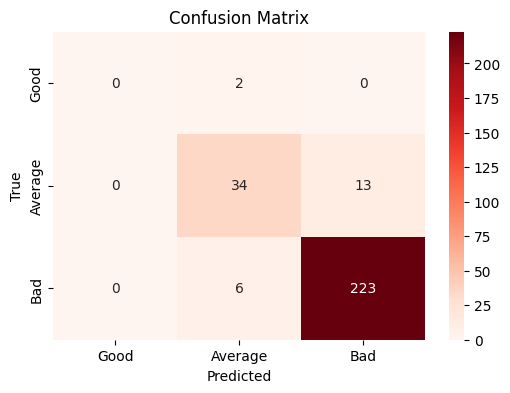

In [38]:
# Support Vector Classifier

model2 = SVC(kernel='linear')

df2 = df.copy()

bin = [30,50,70,100]
label = ['Bad','Average','Good']
df2['Gen Grades'] = pd.cut(df2['Grades'],bins=bin, labels=label)
X2 = df2[['Socioeconomic Score', 'Study Hours', 'Sleep Hours', 'Attendance (%)']]     
Y2 = df2['Gen Grades'] 

Xtrain2, Xtest2, Ytrain2, Ytest2 = train_test_split(X2, Y2, test_size=0.2, random_state=7)

model2.fit(Xtrain2, Ytrain2)
print("SVM:\n")

spred = model2.predict(Xtest2)

sacc = accuracy_score(Ytest2, spred)
spre = precision_score(Ytest2, spred, average='weighted', zero_division=0)
srec = recall_score(Ytest2, spred, average='weighted')
sf1s = f1_score(Ytest2, spred, average='weighted')
scom = confusion_matrix(Ytest2, spred, labels=['Good','Average','Bad']) # to print in order
scre = classification_report(Ytest2, spred, labels=['Good','Average','Bad'], zero_division=0)
cross_score2 = cross_val_score(model2, X2, Y2, cv=5, scoring="accuracy")

print("\nAccuracy: ",sacc)
print("Precision: ",spre)
print("Recall: ",srec)
print("F1 Score: ",sf1s)
print("\nCross Validation:\n", cross_score2)
print(f"\nConfusion Matrix: \n{scom}")
print(f"\nClassification Report: \n{scre}")

plt.figure(figsize=(6, 4))
sns.heatmap(scom, annot=True, fmt='g', cmap='Reds', xticklabels=['Good', 'Average', 'Bad'], yticklabels=['Good','Average', 'Bad'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


DT:


Accuracy:  0.960431654676259
Precision:  0.9572734669407331
Recall:  0.960431654676259
F1 Score:  0.9580270476425888

Cross Validation:
 [0.97122302 0.9676259  0.9352518  0.93140794 0.96750903]

Confusion Matrix: 
[[  0   2   0]
 [  0  45   2]
 [  0   7 222]]

Classification Report: 
              precision    recall  f1-score   support

        Good       0.00      0.00      0.00         2
     Average       0.83      0.96      0.89        47
         Bad       0.99      0.97      0.98       229

    accuracy                           0.96       278
   macro avg       0.61      0.64      0.62       278
weighted avg       0.96      0.96      0.96       278



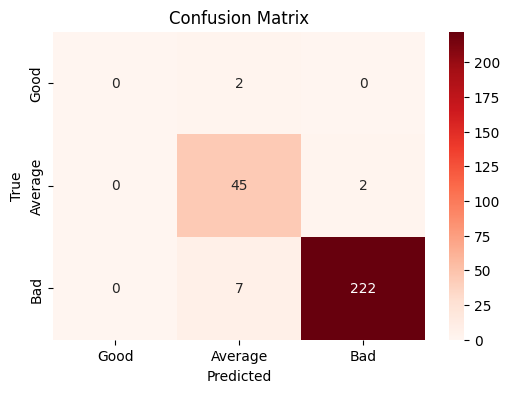

In [39]:
# Decision Tree Classifier

df3 = df2.copy()
df3.drop(columns='Grades', inplace=True)

model3 = DecisionTreeClassifier(max_depth=7, min_samples_split=10)

X3 = df3.drop(columns='Gen Grades')
Y3 = df3['Gen Grades']

Xtrain3, Xtest3, Ytrain3, Ytest3 = train_test_split(X3, Y3, test_size=0.2, random_state=7)

model3.fit(Xtrain3, Ytrain3)
print("DT:\n")

dpred = model3.predict(Xtest3)

dacc = accuracy_score(Ytest3, dpred)
dpre = precision_score(Ytest3, dpred, average='weighted', zero_division=0)
drec = recall_score(Ytest3, dpred, average='weighted')
df1s = f1_score(Ytest3, dpred, average='weighted')
dcom = confusion_matrix(Ytest3, dpred, labels=['Good','Average','Bad']) # to print in order
dcre = classification_report(Ytest3, dpred, labels=['Good','Average','Bad'], zero_division=0)
cross_score3 = cross_val_score(model3, X3, Y3, cv=5, scoring="accuracy")

print("\nAccuracy: ",dacc)
print("Precision: ",dpre)
print("Recall: ",drec)
print("F1 Score: ",df1s)
print("\nCross Validation:\n", cross_score3)
print(f"\nConfusion Matrix: \n{dcom}")
print(f"\nClassification Report: \n{dcre}")

plt.figure(figsize=(6, 4))
sns.heatmap(dcom, annot=True, fmt='g', cmap='Reds', xticklabels=['Good', 'Average', 'Bad'], yticklabels=['Good','Average', 'Bad'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()



RF:


Accuracy:  0.9496402877697842
Precision:  0.9426640505777196
Recall:  0.9496402877697842
F1 Score:  0.9461370034407257

Cross Validation:
 [0.96402878 0.97841727 0.95323741 0.96028881 0.97472924]

Confusion Matrix: 
[[  0   2   0]
 [  0  40   7]
 [  0   5 224]]

Classification Report: 
              precision    recall  f1-score   support

        Good       0.00      0.00      0.00         2
     Average       0.85      0.85      0.85        47
         Bad       0.97      0.98      0.97       229

    accuracy                           0.95       278
   macro avg       0.61      0.61      0.61       278
weighted avg       0.94      0.95      0.95       278



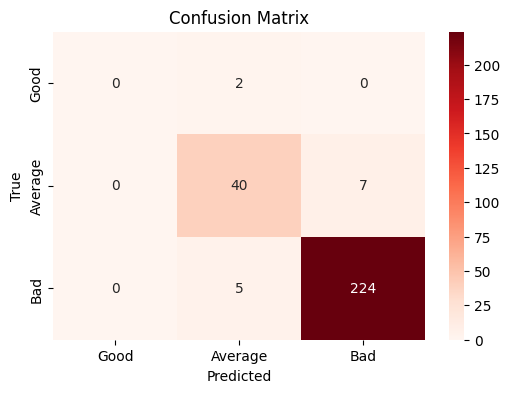

In [40]:

# Random Forest Classifier

df4 = df2.copy()
df4.drop(columns='Grades', inplace=True)

model4 =RandomForestClassifier(n_estimators=100, max_depth=7, min_samples_split=10)

X4 = df4.drop(columns='Gen Grades')
Y4 = df4['Gen Grades']

Xtrain4, Xtest4, Ytrain4, Ytest4 = train_test_split(X4, Y4, test_size=0.2, random_state=7)

model4.fit(Xtrain4, Ytrain4)
print("RF:\n")

rpred = model4.predict(Xtest4)

racc = accuracy_score(Ytest4, rpred)
rpre = precision_score(Ytest4, rpred, average='weighted', zero_division=0)
rrec = recall_score(Ytest4, rpred, average='weighted')
rf1s = f1_score(Ytest4, rpred, average='weighted')
rcom = confusion_matrix(Ytest4, rpred, labels=['Good','Average','Bad']) # to print in order
rcre = classification_report(Ytest4, rpred, labels=['Good','Average','Bad'], zero_division=0)
cross_score4 = cross_val_score(model4, X4, Y4, cv=5, scoring='accuracy')

print("\nAccuracy: ",racc)
print("Precision: ",rpre)
print("Recall: ",rrec)
print("F1 Score: ",rf1s)
print("\nCross Validation:\n", cross_score4)
print(f"\nConfusion Matrix: \n{rcom}")
print(f"\nClassification Report: \n{rcre}")

plt.figure(figsize=(6, 4))
sns.heatmap(rcom, annot=True, fmt='g', cmap='Reds', xticklabels=['Good', 'Average', 'Bad'], yticklabels=['Good','Average', 'Bad'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [37]:
#Model Evaluation:
#Error, Accuracies and Cross Validation Score:

#print("Error (For Regression):\n")
#print("Linear Regression (MAE):", mae)
#print("\nAccuracy of each model (For Classification):\n")
#print("SVM: ", sacc)
#print("Decision Tree: ", dacc)
#print("Random Forest: ", racc)

#print("\nCross Validation - LR:\n", cross_score1)
#print("\nCross Validation - SVM:\n", cross_score2)
#print("\nCross Validation - DT:\n", cross_score3)
#print("\nCross Validation - RF:\n", cross_score4)

# Performance:

print("Performance (calculated using accuracy and cross validation score) of each model:\n")

final = {
    "Support Vector Classifier" : (sacc + (np.mean(cross_score1)))/2,
    "Decision Tree Classifier" : (dacc + (np.mean(cross_score2)))/2,
    "Random Forest Classifier" : (racc + (np.mean(cross_score3)))/2
}

print("Best Model for Regression: Linear Regression(Since we trained one model for regression)")
print("Best Model for Classification:", max(final, key=final.get))

Performance (calculated using accuracy and cross validation score) of each model:

Best Model for Regression: Linear Regression(Since we trained one model for regression)
Best Model for Classification: Random Forest Classifier
